In [11]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import sklearn
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df_non_weather_features = pd.read_csv('/content/drive/MyDrive/Hackathon_Eleven/waiting_times_train.csv')
df_non_weather_features['DATETIME'] = pd.to_datetime(df_non_weather_features['DATETIME'])
df_non_weather_features = pd.get_dummies(df_non_weather_features, columns=['ENTITY_DESCRIPTION_SHORT'])

df_weather_features = pd.read_csv('/content/drive/MyDrive/Hackathon_Eleven/weather_data.csv')
df_weather_features['DATETIME'] = pd.to_datetime(df_weather_features['DATETIME'])

df = pd.merge(df_non_weather_features, df_weather_features, on='DATETIME')

df.head()

,DATETIME,ADJUST_CAPACITY,DOWNTIME,CURRENT_WAIT_TIME,TIME_TO_PARADE_1,TIME_TO_PARADE_2,TIME_TO_NIGHT_SHOW,WAIT_TIME_IN_2H,ENTITY_DESCRIPTION_SHORT_Flying Coaster,ENTITY_DESCRIPTION_SHORT_Pirate Ship,ENTITY_DESCRIPTION_SHORT_Water Ride,temp,dew_point,feels_like,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all
0,2022-02-05 11:45:00,247.0,0,20,NaN,NaN,NaN,30.0,0,0,1,6.0175,4.9725,3.63,1026.75,93.00,3.1500,0.383750,0.139065,64.0
1,2022-02-05 11:45:00,756.0,0,50,NaN,NaN,NaN,50.0,1,0,0,6.0175,4.9725,3.63,1026.75,93.00,3.1500,0.383750,0.139065,64.0
2,2022-02-05 11:45:00,153.0,0,50,NaN,NaN,NaN,15.0,0,1,0,6.0175,4.9725,3.63,1026.75,93.00,3.1500,0.383750,0.139065,64.0
3,2019-02-24 10:45:00,247.0,0,30,375.0,NaN,495.0,25.0,0,0,1,7.9200,-3.8150,6.01,1035.75,41.75,3.0025,0.162423,0.347362,0.0
4,2019-02-24 10:45:00,756.0,0,15,375.0,NaN,495.0,25.0,1,0,0,7.9200,-3.8150,6.01,1035.75,41.75,3.0025,0.162423,0.347362,0.0


In [23]:
def map_month_to_season(month_number):
  if 3 <= month_number <= 5:
    return "spring"
  elif 6 <= month_number <= 8:
    return "summer"
  elif 9 <= month_number <= 11:
    return "autumn"
  else:
    return "winter"


def map_hour_to_moment(hour):
  """moment = period of the day (morning, lunch or afternoon)"""
  if hour <= 11:
    return "morning"
  elif 12 <= hour <= 13:
    return "lunch"
  elif 14 <= hour <= 16:
    return "afternoon"
  else:
    return "evening"


df['weekend'] = (df['DATETIME'].dt.weekday > 4).astype(int)

df['season'] = df['DATETIME'].map(lambda x: map_month_to_season(x.month))
df = pd.get_dummies(df, columns=['season'])

df['moment'] = df['DATETIME'].map(lambda x: map_hour_to_moment(x.hour))
df = pd.get_dummies(df, columns=['moment'])

df = df.drop('DATETIME', axis=1)

df.head()

,ADJUST_CAPACITY,DOWNTIME,CURRENT_WAIT_TIME,TIME_TO_PARADE_1,TIME_TO_PARADE_2,TIME_TO_NIGHT_SHOW,WAIT_TIME_IN_2H,ENTITY_DESCRIPTION_SHORT_Flying Coaster,ENTITY_DESCRIPTION_SHORT_Pirate Ship,ENTITY_DESCRIPTION_SHORT_Water Ride,...,clouds_all,weekend,season_autumn,season_spring,season_summer,season_winter,moment_afternoon,moment_evening,moment_lunch,moment_morning
0,247.0,0,20,NaN,NaN,NaN,30.0,0,0,1,...,64.0,1,0,0,0,1,0,0,0,1
1,756.0,0,50,NaN,NaN,NaN,50.0,1,0,0,...,64.0,1,0,0,0,1,0,0,0,1
2,153.0,0,50,NaN,NaN,NaN,15.0,0,1,0,...,64.0,1,0,0,0,1,0,0,0,1
3,247.0,0,30,375.0,NaN,495.0,25.0,0,0,1,...,0.0,1,0,0,0,1,0,0,0,1
4,756.0,0,15,375.0,NaN,495.0,25.0,1,0,0,...,0.0,1,0,0,0,1,0,0,0,1


In [24]:
continuous_columns = df.select_dtypes(include=['float64'])

# for column_name in continuous_columns.columns:


df.head()

,ADJUST_CAPACITY,DOWNTIME,CURRENT_WAIT_TIME,TIME_TO_PARADE_1,TIME_TO_PARADE_2,TIME_TO_NIGHT_SHOW,WAIT_TIME_IN_2H,ENTITY_DESCRIPTION_SHORT_Flying Coaster,ENTITY_DESCRIPTION_SHORT_Pirate Ship,ENTITY_DESCRIPTION_SHORT_Water Ride,...,clouds_all,weekend,season_autumn,season_spring,season_summer,season_winter,moment_afternoon,moment_evening,moment_lunch,moment_morning
0,247.0,0,20,NaN,NaN,NaN,30.0,0,0,1,...,64.0,1,0,0,0,1,0,0,0,1
1,756.0,0,50,NaN,NaN,NaN,50.0,1,0,0,...,64.0,1,0,0,0,1,0,0,0,1
2,153.0,0,50,NaN,NaN,NaN,15.0,0,1,0,...,64.0,1,0,0,0,1,0,0,0,1
3,247.0,0,30,375.0,NaN,495.0,25.0,0,0,1,...,0.0,1,0,0,0,1,0,0,0,1
4,756.0,0,15,375.0,NaN,495.0,25.0,1,0,0,...,0.0,1,0,0,0,1,0,0,0,1


In [30]:
df_dhia = df.drop(['TIME_TO_PARADE_1', 'TIME_TO_PARADE_2','dew_point','feels_like','snow_1h'], axis=1)
df_dhia.head()

,ADJUST_CAPACITY,DOWNTIME,CURRENT_WAIT_TIME,TIME_TO_NIGHT_SHOW,WAIT_TIME_IN_2H,ENTITY_DESCRIPTION_SHORT_Flying Coaster,ENTITY_DESCRIPTION_SHORT_Pirate Ship,ENTITY_DESCRIPTION_SHORT_Water Ride,temp,pressure,...,clouds_all,weekend,season_autumn,season_spring,season_summer,season_winter,moment_afternoon,moment_evening,moment_lunch,moment_morning
0,247.0,0,20,NaN,30.0,0,0,1,6.0175,1026.75,...,64.0,1,0,0,0,1,0,0,0,1
1,756.0,0,50,NaN,50.0,1,0,0,6.0175,1026.75,...,64.0,1,0,0,0,1,0,0,0,1
2,153.0,0,50,NaN,15.0,0,1,0,6.0175,1026.75,...,64.0,1,0,0,0,1,0,0,0,1
3,247.0,0,30,495.0,25.0,0,0,1,7.9200,1035.75,...,0.0,1,0,0,0,1,0,0,0,1
4,756.0,0,15,495.0,25.0,1,0,0,7.9200,1035.75,...,0.0,1,0,0,0,1,0,0,0,1


from matplotlib import pyplot as plt
_df_0['ADJUST_CAPACITY'].plot(kind='hist', bins=20, title='ADJUST_CAPACITY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CURRENT_WAIT_TIME'].plot(kind='hist', bins=20, title='CURRENT_WAIT_TIME')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['TIME_TO_NIGHT_SHOW'].plot(kind='hist', bins=20, title='TIME_TO_NIGHT_SHOW')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['WAIT_TIME_IN_2H'].plot(kind='hist', bins=20, title='WAIT_TIME_IN_2H')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ADJUST_CAPACITY', y='CURRENT_WAIT_TIME', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='CURRENT_WAIT_TIME', y='TIME_TO_NIGHT_SHOW', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='TIME_TO_NIGHT_SHOW', y='WAIT_TIME_IN_2H', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='WAIT_TIME_IN_2H', y='ENTITY_DESCRIPTION_SHORT_Flying Coaster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DOWNTIME']
  ys = series['ADJUST_CAPACITY']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('DOWNTIME', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DOWNTIME')
_ = plt.ylabel('ADJUST_CAPACITY')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DOWNTIME']
  ys = series['WAIT_TIME_IN_2H']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('DOWNTIME', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DOWNTIME')
_ = plt.ylabel('WAIT_TIME_IN_2H')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DOWNTIME']
  ys = series['ENTITY_DESCRIPTION_SHORT_Flying Coaster']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('DOWNTIME', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DOWNTIME')
_ = plt.ylabel('ENTITY_DESCRIPTION_SHORT_Flying Coaster')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DOWNTIME']
  ys = series['ENTITY_DESCRIPTION_SHORT_Pirate Ship']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('DOWNTIME', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DOWNTIME')
_ = plt.ylabel('ENTITY_DESCRIPTION_SHORT_Pirate Ship')

from matplotlib import pyplot as plt
_df_12['ADJUST_CAPACITY'].plot(kind='line', figsize=(8, 4), title='ADJUST_CAPACITY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['CURRENT_WAIT_TIME'].plot(kind='line', figsize=(8, 4), title='CURRENT_WAIT_TIME')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['TIME_TO_NIGHT_SHOW'].plot(kind='line', figsize=(8, 4), title='TIME_TO_NIGHT_SHOW')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['WAIT_TIME_IN_2H'].plot(kind='line', figsize=(8, 4), title='WAIT_TIME_IN_2H')
plt.gca().spines[['top', 'right']].set_visible(False)

In [31]:
nbr_lignes_nan_nightshow = df_dhia['TIME_TO_NIGHT_SHOW'].isna().sum()
print(f"le pourcentage de lignes Nan pour Time to Night Show est: {nbr_lignes_nan_nightshow/len(df_dhia):.2%}")

le pourcentage de lignes Nan pour Time to Night Show est: 37.88%


In [37]:
nbr_lignes_nan_rain_1h = df_dhia['rain_1h'].isna().sum()
print(f"le pourcentage de lignes Nan pour Rain_1h est: {nbr_lignes_nan_rain_1h/len(df_dhia):.2%}")

le pourcentage de lignes Nan pour Rain_1h est: 0.00%


In [41]:
nbr_lignes_nan = df_dhia.isna().any(axis=1).sum()
print(f"le pourcentage de lignes Nan est: {nbr_lignes_nan/len(df_dhia):.2%}")

le pourcentage de lignes Nan est: 37.88%


<Axes: >

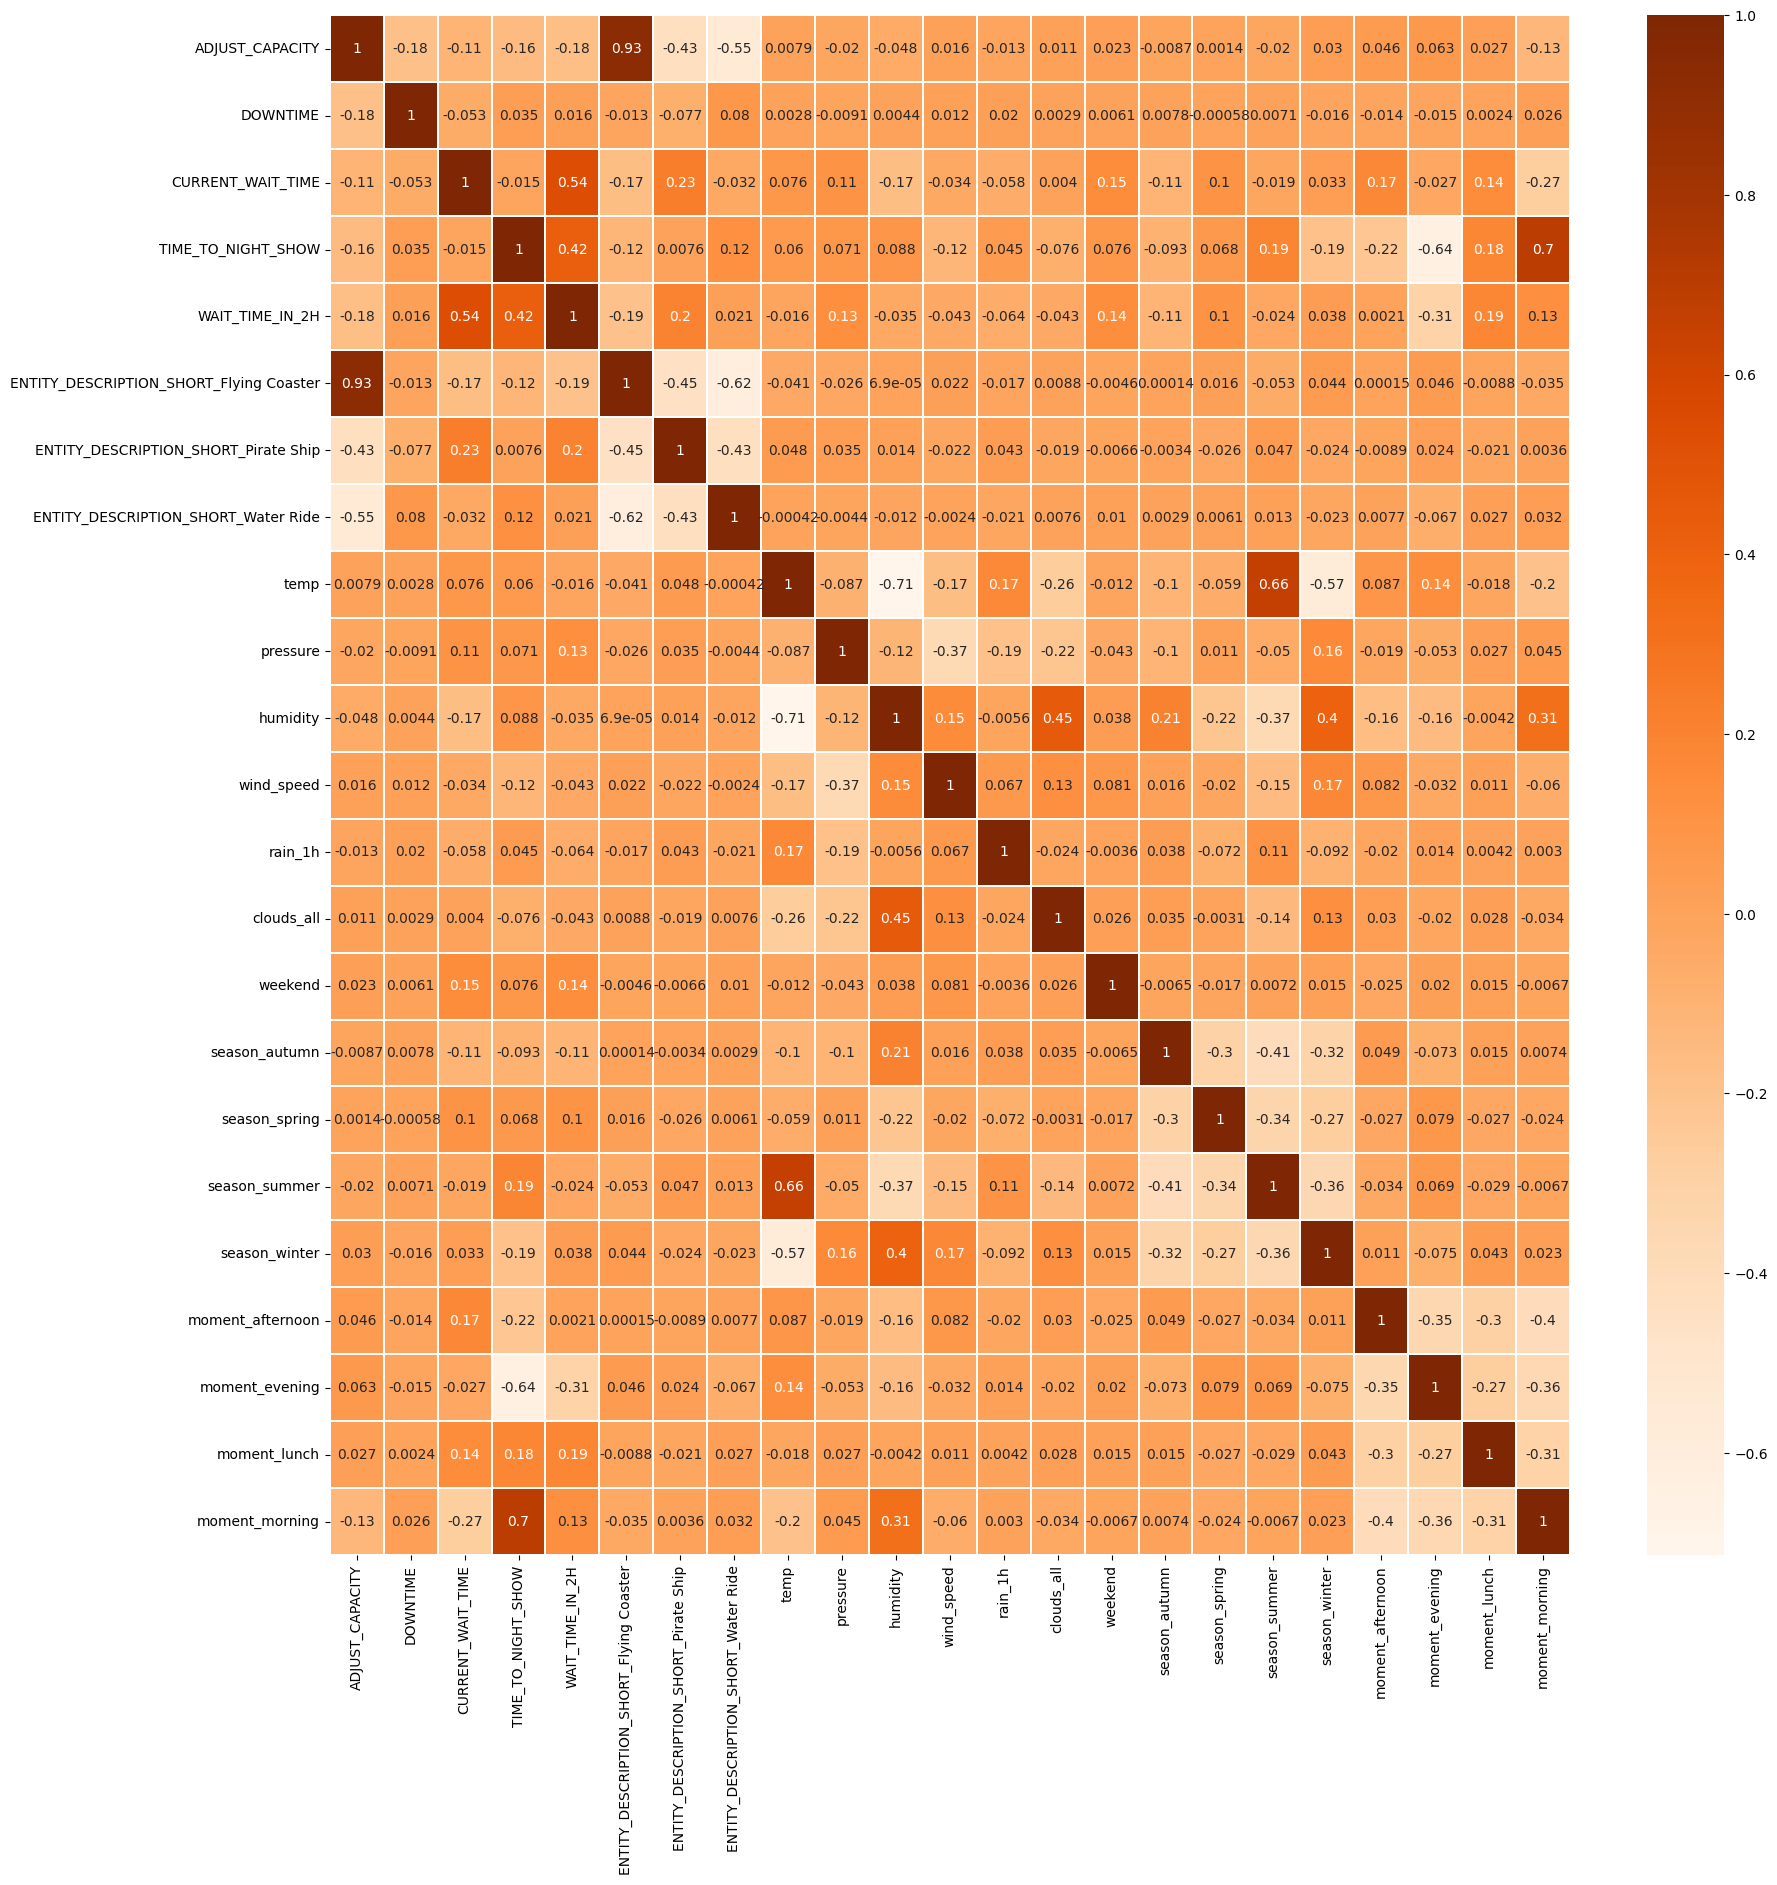

In [35]:
correlation_matrix = df_dhia.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot= True, linewidth=0.1, cmap= 'Oranges')

In [42]:
df_dhia_1 = df_dhia
# Calcul de la moyenne de la fonctionnalité 'TIME_TO_NIGHT_SHOW'
moyenne = df_dhia_1['TIME_TO_NIGHT_SHOW'].mean()

# Remplissage des valeurs NaN avec la moyenne
df_dhia_1['TIME_TO_NIGHT_SHOW'].fillna(moyenne, inplace=True)

In [43]:
nbr_lignes_nan_nightshow = df_dhia_1['TIME_TO_NIGHT_SHOW'].isna().sum()
print(f"le pourcentage de lignes Nan pour Time to Night Show est: {nbr_lignes_nan_nightshow/len(df_dhia_1):.2%}")

le pourcentage de lignes Nan pour Time to Night Show est: 0.00%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# # Séparation des caractéristiques (X) de la cible (y)
# X = df_dhia_1.drop(columns=['WAIT_TIME_IN_2H'])
# y = df_dhia_1['WAIT_TIME_IN_2H']

# # Séparation des données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Définition des colonnes catégorielles binaires
# binary_columns = ['binary_feature1', 'binary_feature2', ...]

In [ ]:
# # Construction du préprocesseur
# preprocessor = ColumnTransformer([
#     ('binary', OneHotEncoder(), binary_columns),
#     ('numeric', StandardScaler(), ~X.columns.isin(binary_columns))  # Mise à l'échelle des colonnes continues
# ])

# # Construction du pipeline de transformation et d'entraînement du modèle
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())  # Vous pouvez remplacer LinearRegression par tout autre modèle de régression
# ])

# # Entraînement du modèle
# pipeline.fit(X_train, y_train)

# # Prédiction sur l'ensemble de test
# predictions = pipeline.predict(X_test)

# # Évaluation du modèle
# mse = mean_squared_error(y_test, predictions)
# print("Mean Squared Error:", mse)


In [45]:
df_test = pd.read_csv
df_non_weather_features_test = pd.read_csv('/content/drive/MyDrive/Hackathon_Eleven/waiting_times_X_test_val.csv')
df_non_weather_features_test['DATETIME'] = pd.to_datetime(df_non_weather_features_test['DATETIME'])
df_non_weather_features_test = pd.get_dummies(df_non_weather_features_test, columns=['ENTITY_DESCRIPTION_SHORT'])

df_weather_features_test = pd.read_csv('/content/drive/MyDrive/Hackathon_Eleven/weather_data.csv')
df_weather_features_test['DATETIME'] = pd.to_datetime(df_weather_features_test['DATETIME'])

df = pd.merge(df_non_weather_features_test, df_weather_features_test, on='DATETIME')

df.head()

,DATETIME,ADJUST_CAPACITY,DOWNTIME,CURRENT_WAIT_TIME,TIME_TO_PARADE_1,TIME_TO_PARADE_2,TIME_TO_NIGHT_SHOW,ENTITY_DESCRIPTION_SHORT_Flying Coaster,ENTITY_DESCRIPTION_SHORT_Pirate Ship,ENTITY_DESCRIPTION_SHORT_Water Ride,temp,dew_point,feels_like,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all
0,2019-11-23 10:45:00,247.0,0,20,375.0,75.0,675.0,0,0,1,8.8875,8.5125,6.000,992.0,97.5,5.5250,1.642500,0.180000,100.0
1,2022-01-03 16:45:00,153.0,0,45,NaN,NaN,NaN,0,1,0,10.9750,10.4375,10.645,1013.0,96.5,6.0025,0.782500,0.156483,100.0
2,2021-12-04 15:30:00,255.0,0,40,NaN,NaN,NaN,0,1,0,7.6100,4.7100,4.430,1002.5,82.0,5.4200,0.195000,0.201127,88.5
3,2021-12-04 15:30:00,247.0,0,50,NaN,NaN,NaN,0,0,1,7.6100,4.7100,4.430,1002.5,82.0,5.4200,0.195000,0.201127,88.5
4,2020-02-05 13:15:00,247.0,0,15,225.0,NaN,345.0,0,0,1,9.0025,4.7100,8.355,1037.0,74.5,1.6475,0.350361,0.222829,100.0


In [46]:
df['weekend'] = (df['DATETIME'].dt.weekday > 4).astype(int)

df['season'] = df['DATETIME'].map(lambda x: map_month_to_season(x.month))
df = pd.get_dummies(df, columns=['season'])

df['moment'] = df['DATETIME'].map(lambda x: map_hour_to_moment(x.hour))
df = pd.get_dummies(df, columns=['moment'])

df = df.drop('DATETIME', axis=1)

df.head()

,ADJUST_CAPACITY,DOWNTIME,CURRENT_WAIT_TIME,TIME_TO_PARADE_1,TIME_TO_PARADE_2,TIME_TO_NIGHT_SHOW,ENTITY_DESCRIPTION_SHORT_Flying Coaster,ENTITY_DESCRIPTION_SHORT_Pirate Ship,ENTITY_DESCRIPTION_SHORT_Water Ride,temp,...,clouds_all,weekend,season_autumn,season_spring,season_summer,season_winter,moment_afternoon,moment_evening,moment_lunch,moment_morning
0,247.0,0,20,375.0,75.0,675.0,0,0,1,8.8875,...,100.0,1,1,0,0,0,0,0,0,1
1,153.0,0,45,NaN,NaN,NaN,0,1,0,10.9750,...,100.0,0,0,0,0,1,1,0,0,0
2,255.0,0,40,NaN,NaN,NaN,0,1,0,7.6100,...,88.5,1,0,0,0,1,1,0,0,0
3,247.0,0,50,NaN,NaN,NaN,0,0,1,7.6100,...,88.5,1,0,0,0,1,1,0,0,0
4,247.0,0,15,225.0,NaN,345.0,0,0,1,9.0025,...,100.0,0,0,0,0,1,0,0,1,0


In [47]:
df_test = df.drop(['TIME_TO_PARADE_1', 'TIME_TO_PARADE_2','dew_point','feels_like','snow_1h'], axis=1)
df_test.head()

,ADJUST_CAPACITY,DOWNTIME,CURRENT_WAIT_TIME,TIME_TO_NIGHT_SHOW,ENTITY_DESCRIPTION_SHORT_Flying Coaster,ENTITY_DESCRIPTION_SHORT_Pirate Ship,ENTITY_DESCRIPTION_SHORT_Water Ride,temp,pressure,humidity,...,clouds_all,weekend,season_autumn,season_spring,season_summer,season_winter,moment_afternoon,moment_evening,moment_lunch,moment_morning
0,247.0,0,20,675.0,0,0,1,8.8875,992.0,97.5,...,100.0,1,1,0,0,0,0,0,0,1
1,153.0,0,45,NaN,0,1,0,10.9750,1013.0,96.5,...,100.0,0,0,0,0,1,1,0,0,0
2,255.0,0,40,NaN,0,1,0,7.6100,1002.5,82.0,...,88.5,1,0,0,0,1,1,0,0,0
3,247.0,0,50,NaN,0,0,1,7.6100,1002.5,82.0,...,88.5,1,0,0,0,1,1,0,0,0
4,247.0,0,15,345.0,0,0,1,9.0025,1037.0,74.5,...,100.0,0,0,0,0,1,0,0,1,0


In [49]:
nbr_lignes_nan_nightshow = df_test['TIME_TO_NIGHT_SHOW'].isna().sum()
print(f"le pourcentage de lignes Nan pour Time to Night Show est: {nbr_lignes_nan_nightshow/len(df_test):.2%}")

le pourcentage de lignes Nan pour Time to Night Show est: 44.19%


In [50]:
df_test_1 = df_test
# Calcul de la moyenne de la fonctionnalité 'TIME_TO_NIGHT_SHOW'
moyenne = df_test_1['TIME_TO_NIGHT_SHOW'].mean()

# Remplissage des valeurs NaN avec la moyenne
df_test_1['TIME_TO_NIGHT_SHOW'].fillna(moyenne, inplace=True)


nbr_lignes_nan = df_test_1.isna().any(axis=1).sum()
print(f"le pourcentage de lignes Nan est: {nbr_lignes_nan/len(df_test_1):.2%}")

le pourcentage de lignes Nan est: 0.00%


In [71]:
len(df_test_1)

2444

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# df_dhia_1 est mon DataFrame d'entraînement avec toutes les caractéristiques nécessaires
X = df_dhia_1.drop(columns=['WAIT_TIME_IN_2H'])  # Caractéristiques indépendantes
y = df_dhia_1['WAIT_TIME_IN_2H']  # Variable cible

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)


# # Séparation des caractéristiques continues et des caractéristiques catégorielles
# features_catégorielles = ['ENTITY_DESCRIPTION_SHORT_Flying Coaster', 'ENTITY_DESCRIPTION_SHORT_Pirate Ship', 'ENTITY_DESCRIPTION_SHORT_Water Ride', 'weekend', 'season_autumn', 'season_spring', 'season_summer', 'season_winter', 'moment_afternoon', 'moment_evening', 'moment_lunch',	'moment_morning']

# features_continues = X.drop(columns=features_catégorielles).columns


# # Normalisation des caractéristiques continues
# scaler = StandardScaler()
# X_train[features_continues] = scaler.fit_transform(X_train[features_continues])
# X_test[features_continues] = scaler.transform(X_test[features_continues])


# Initialisation et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_relu = np.maximum(y_pred, 0)
# Calcul de l'erreur quadratique moyenne (MSE) sur l'ensemble de test
mse = np.sqrt(mean_squared_error(y_test, y_pred_relu))
print("Mean Squared Error:", mse)



Mean Squared Error: 11.082267671595734


In [104]:

import xgboost as xgb

# Initialisation du modèle XGBoost
model = xgb.XGBRegressor()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_xg = model.predict(X_test)

# Application de la fonction ReLU sur les prédictions y_pred
y_pred_relu_xg = np.maximum(y_pred_xg, 0)
y_pred_round = np.round(y_pred_relu_xg / 5) * 5
# Calcul de l'erreur quadratique moyenne (RMSE) sur l'ensemble de test
rmse = np.sqrt(mean_squared_error(y_test, y_pred_round))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 7.992584163914114


In [105]:
'''N OUBLIE PAS DE TESTER DE PARTAGER LA SEMAINE EN WORK DAY, SAMEDI, DIMANCHE'''

'N OUBLIE PAS DE TESTER DE PARTAGER LA SEMAINE EN WORK DAY, SAMEDI, DIMANCHE'

In [109]:
y_pred_test_val = model.predict(df_test_1)
y_pred_relu_test_val = np.maximum(y_pred_test_val, 0)
y_pred_rounded = y_pred_relu_test_val #np.round(y_pred_relu_test_val / 5) * 5
print(y_pred_rounded)

[28.766806 35.495827 33.430492 ... 32.736053 19.33016  24.941393]


In [110]:
test_val = pd.read_csv('/content/drive/MyDrive/Hackathon_Eleven/waiting_times_X_test_val.csv')
def to_solution_format(data, predicted_wait_times):
    sol = pd.DataFrame(
        {
            "DATETIME": data["DATETIME"],
            "ENTITY_DESCRIPTION_SHORT": data["ENTITY_DESCRIPTION_SHORT"],
            "y_pred": predicted_wait_times,
            "KEY": "Validation" ,
        }
    )
    return sol

In [111]:
# Modifier le 1er argument de to_solution_format pour créer la solution souhaitée

test_val = pd.read_csv('/content/drive/MyDrive/Hackathon_Eleven/waiting_times_X_test_val.csv')
sol_reglin = to_solution_format(test_val, y_pred_rounded)
sol_reglin.head()
sol_reglin.to_csv("groupeE_xg_boost.csv", sep=',', index=False, encoding='utf-8')